In [217]:
from IPython.display import display, HTML

display(HTML('<h1>Svar på frågorna i Del 1<h1>'))

print("""
1. Beskriv kort hur en relationsdatabas fungerar:
En relationsdatabas organiserar data i tabeller, där varje tabell består av rader (objekt) och kolumner (attribut).
Tabellerna är relaterade till varandra via nycklar: en primary key identifierar varje rad unikt,
och foreign keys används för att skapa kopplingar mellan olika tabeller. SQL används för att lagra, hämta och ändra data i dessa tabeller.

2. Vad menas med 'CRUD'-flödet?
CRUD står för de fyra grundläggande operationerna som kan utföras på data i en databas:
- Create: Lägg till ny data.
- Read: Hämta data.
- Update: Uppdatera befintlig data.
- Delete: Ta bort data.

3. Beskriv kort vad en 'left join' och en 'inner join' är. Varför använder man det?
- Left join hämtar alla rader från den vänstra tabellen och matchande rader från den högra tabellen.
  Om ingen matchning finns, sätts värdet för den högra tabellen till NULL.
- Inner join hämtar bara de rader där det finns en matchning mellan de två tabellerna. De rader som inte matchar filtreras bort.
Man använder dessa för att kombinera data från flera tabeller baserat på relaterade fält.

4. Beskriv kort vad indexering i SQL innebär:
Indexering i SQL innebär att skapa ett index på en eller flera kolumner i en tabell för att snabbt kunna söka
och hämta data utan att behöva söka igenom hela tabellen.

5. Beskriv kort vad en vy i SQL är:
En vy är en virtuell tabell som representerar resultatet av en SQL-fråga. Den sparar inte data utan hämtar
information från en eller flera tabeller varje gång den används. Vyer används för att förenkla komplexa frågor
eller kontrollera åtkomst till data.

6. Beskriv kort vad en lagrad procedur i SQL är:
En lagrad procedur är en uppsättning SQL-kommandon som lagras och körs som en enhet i databasen.
Den används för att automatisera uppgifter och kan ge bättre prestanda genom att undvika att skriva samma kod upprepade gånger.
""")







1. Beskriv kort hur en relationsdatabas fungerar:
En relationsdatabas organiserar data i tabeller, där varje tabell består av rader (objekt) och kolumner (attribut).
Tabellerna är relaterade till varandra via nycklar: en primary key identifierar varje rad unikt,
och foreign keys används för att skapa kopplingar mellan olika tabeller. SQL används för att lagra, hämta och ändra data i dessa tabeller.

2. Vad menas med 'CRUD'-flödet?
CRUD står för de fyra grundläggande operationerna som kan utföras på data i en databas:
- Create: Lägg till ny data.
- Read: Hämta data.
- Update: Uppdatera befintlig data.
- Delete: Ta bort data.

3. Beskriv kort vad en 'left join' och en 'inner join' är. Varför använder man det?
- Left join hämtar alla rader från den vänstra tabellen och matchande rader från den högra tabellen.
  Om ingen matchning finns, sätts värdet för den högra tabellen till NULL.
- Inner join hämtar bara de rader där det finns en matchning mellan de två tabellerna. De rader som inte m

In [218]:
from IPython.display import display, HTML

display(HTML('<h1>DEL 1. Sammanfattning av databasen AdventureWorks2022<h1>'))

print('AdventureWorks2022 är en omfattande databas som sträcker sig över flera affärsområden såsom försäljning, produktion, inköp, personalhantering och mer. Den är skapad för att ge en autentisk bild av hur en databas för ett cykeltillverknings- och distributionsföretag kan vara strukturerad, vilket gör den till ett värdefullt verktyg för utbildning, testning och affärsanalys.\n')

print("Finance")
print("- Bank\n")

print("HumanResources")
print("- Department")
print("- Employee")
print("- JobTitle\n")

print("Inventory")
print("- InventoryTransaction\n")

print("Production")
print("- Product")
print("- ProductCategory")
print("- ProductSubcategory\n")

print("Purchasing")
print("- PurchaseOrderDetail")
print("- PurchaseOrderHeader")
print("- Vendor\n")

print("Sales")
print("- Customer")
print("- SalesOrderDetail")
print("- SalesOrderHeader\n")

print("SalesPerson")
print("- SalesPerson\n")




AdventureWorks2022 är en omfattande databas som sträcker sig över flera affärsområden såsom försäljning, produktion, inköp, personalhantering och mer. Den är skapad för att ge en autentisk bild av hur en databas för ett cykeltillverknings- och distributionsföretag kan vara strukturerad, vilket gör den till ett värdefullt verktyg för utbildning, testning och affärsanalys.

Finance
- Bank

HumanResources
- Department
- Employee
- JobTitle

Inventory
- InventoryTransaction

Production
- Product
- ProductCategory
- ProductSubcategory

Purchasing
- PurchaseOrderDetail
- PurchaseOrderHeader
- Vendor

Sales
- Customer
- SalesOrderDetail
- SalesOrderHeader

SalesPerson
- SalesPerson



Antal tabeller i databasen: 71
                 table_name
0              SalesTaxRate
1          PersonCreditCard
2               PersonPhone
3            SalesTerritory
4           PhoneNumberType
..                      ...
66                 Location
67                 Password
68  SalesPersonQuotaHistory
69                   Person
70              SalesReason

[71 rows x 1 columns]


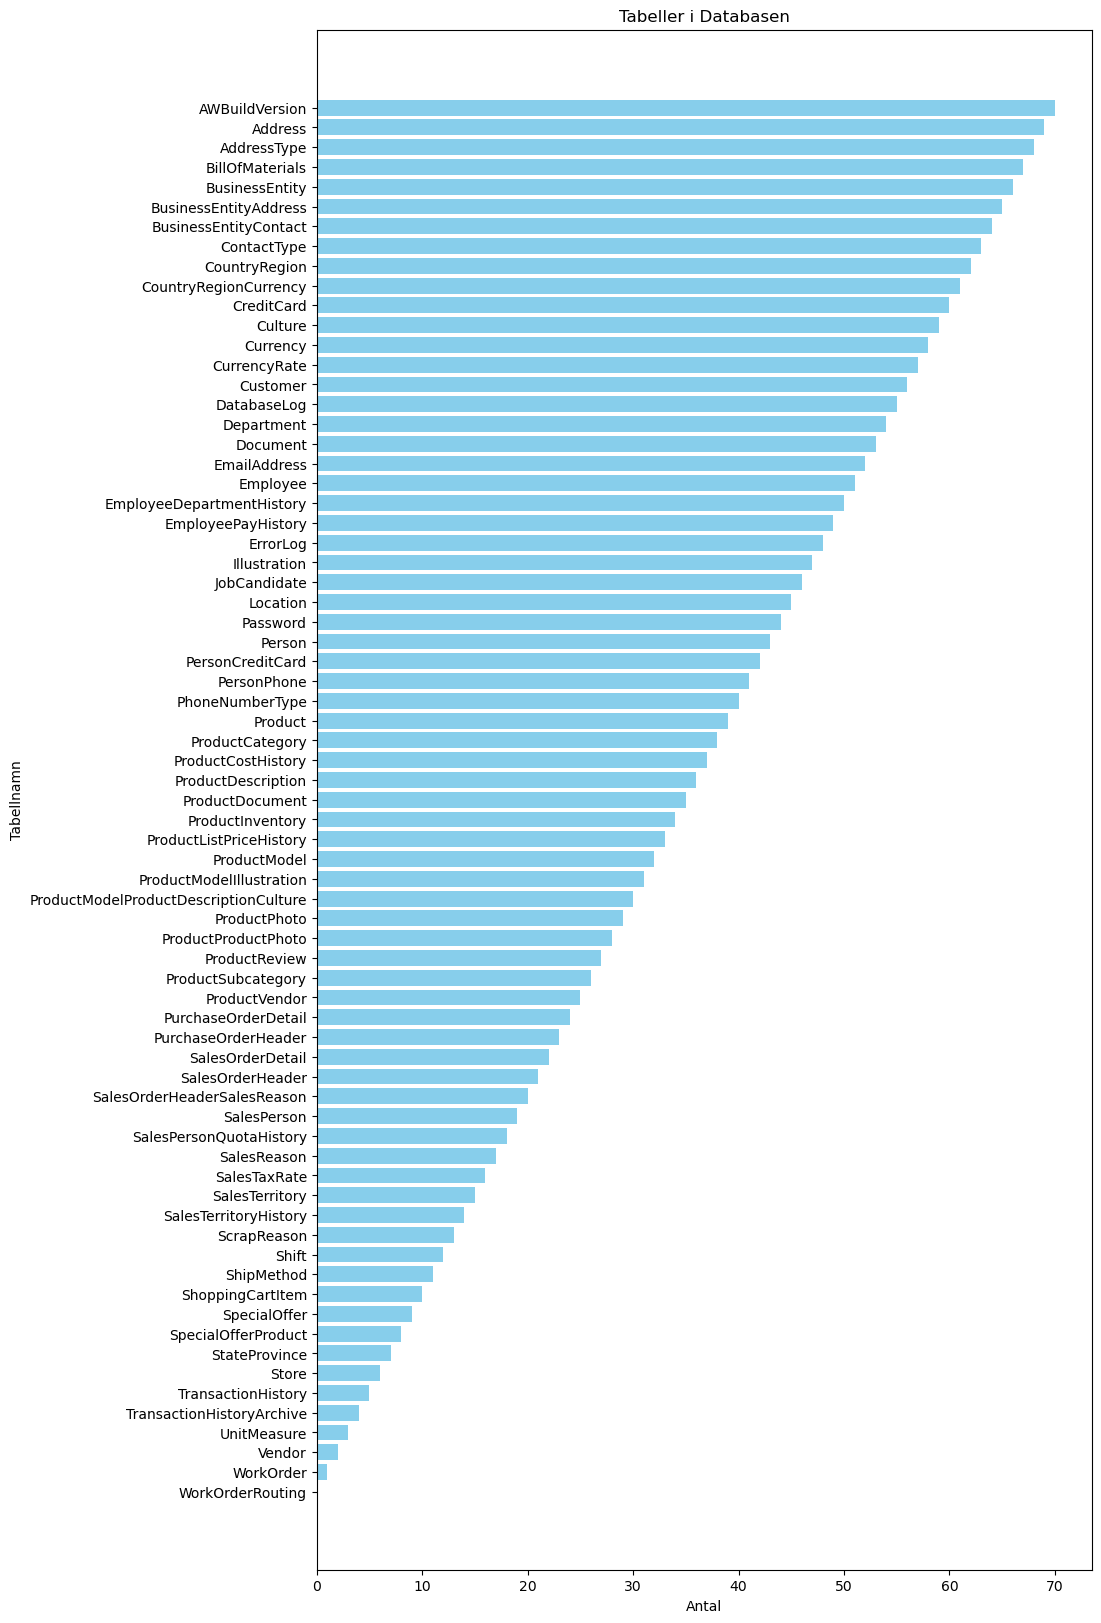

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.engine import URL  

SERVER = 'localhost'  
DATABASE = 'AdventureWorks2022'
USERNAME = 'your_username'  
PASSWORD = 'your_password'  

connection_string = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};Trusted_Connection=yes;Encrypt=no'

connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})

engine = create_engine(connection_url)  

query = "SELECT table_name FROM information_schema.tables WHERE table_type = 'BASE TABLE';"
tables = pd.read_sql(query, engine)

print(f"Antal tabeller i databasen: {len(tables)}")

print(tables)

table_names = tables['table_name'].tolist()

table_names.sort(reverse=True)

plt.figure(figsize=(10, 20))
plt.barh(table_names, range(len(table_names)), color='skyblue')
plt.xlabel('Antal')
plt.ylabel('Tabellnamn')
plt.title('Tabeller i Databasen')
plt.show()




In [242]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


server = 'localhost'  
database = 'AdventureWorks2022'  

engine = create_engine(f'mssql+pyodbc://localhost/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server')

query = """
SELECT 
    p.Name AS ProductName, 
    c.Name AS CategoryName, 
    COUNT(op.ProductID) AS NumberOfProducts
FROM 
    Production.Product p
JOIN 
    Production.ProductSubcategory ps ON p.ProductSubcategoryID = ps.ProductSubcategoryID
JOIN 
    Production.ProductCategory c ON ps.ProductCategoryID = c.ProductCategoryID
LEFT JOIN 
    Sales.SalesOrderDetail op ON p.ProductID = op.ProductID
GROUP BY 
    p.Name, c.Name
ORDER BY 
    NumberOfProducts DESC;
"""

df_sales = pd.read_sql(query, engine)

print(df_sales.head())


              ProductName CategoryName  NumberOfProducts
0   Water Bottle - 30 oz.  Accessories              4688
1            AWC Logo Cap     Clothing              3382
2     Patch Kit/8 Patches  Accessories              3354
3      Mountain Tire Tube  Accessories              3095
4  Sport-100 Helmet, Blue  Accessories              3090


C:\Users\z004d95t\AppData\Local\Temp\ipykernel_23900\3941802523.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NumberOfProducts', y='CategoryName', data=df_sales, palette='viridis', hue=None)


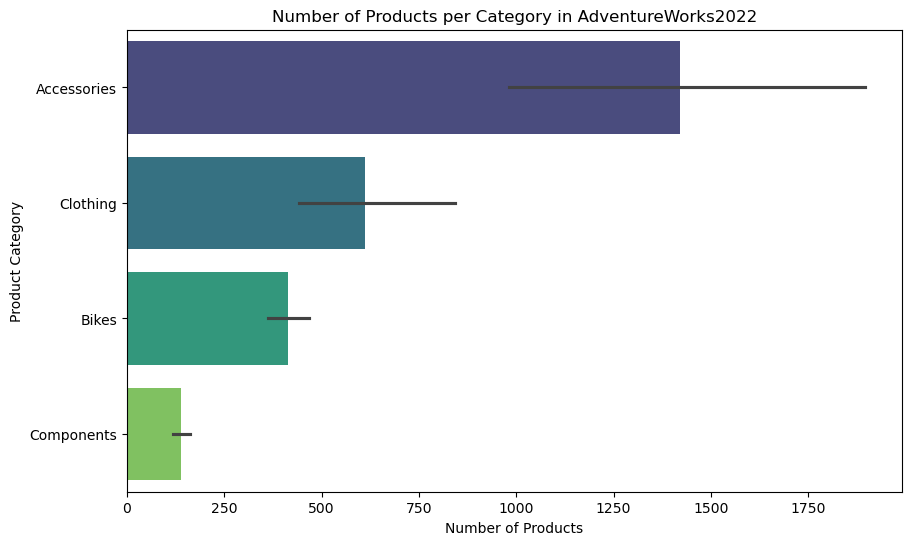

In [221]:
import seaborn as sns

plt.figure(figsize=(10, 6))  
sns.barplot(x='NumberOfProducts', y='CategoryName', data=df_sales, palette='viridis', hue=None)

plt.title('Number of Products per Category in AdventureWorks2022')
plt.xlabel('Number of Products')
plt.ylabel('Product Category')

plt.show()


In [222]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

server = 'loclahost'  
database = 'AdventureWorks2022'  

engine = create_engine(f'mssql+pyodbc://localhost/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server')

query_sales = '''
SELECT 
    ProductID,
    SUM(LineTotal) AS TotalSales
FROM 
    Sales.SalesOrderDetail
GROUP BY 
    ProductID;
'''

df_sales = pd.read_sql(query_sales, engine)

from IPython.display import display, HTML

display(HTML('<h1>Del 2 av programmeringsuppgiften<h1>'))

print(df_sales.head())

mean_sales = df_sales['TotalSales'].mean()
std_sales = df_sales['TotalSales'].std()
n_sales = len(df_sales)

conf_interval_sales = stats.t.interval(0.95, n_sales-1, loc=mean_sales, scale=std_sales/np.sqrt(n_sales))

print(f'Medelvärde för total försäljning per produkt: {mean_sales:.2f}')
print(f'95% konfidensintervall för medelvärde av total försäljning per produkt: {conf_interval_sales}')





   ProductID    TotalSales
0        925  93584.422996
1        902   7201.872000
2        710    513.000000
3        879  39591.000000
4        733  32120.820000
Medelvärde för total försäljning per produkt: 412956.32
95% konfidensintervall för medelvärde av total försäljning per produkt: (328065.4698102282, 497847.17229419295)


In [223]:
top_20_products = df_sales.nlargest(20, 'TotalSales')

bottom_20_products = df_sales.nsmallest(20, 'TotalSales')

print("Top 20 produkter med högst försäljning:")
print(top_20_products[['ProductID', 'TotalSales']])

print("\nBotten 20 produkter med lägst försäljning:")
print(bottom_20_products[['ProductID', 'TotalSales']])


Top 20 produkter med högst försäljning:
     ProductID    TotalSales
38         782  4.400593e+06
137        783  4.009495e+06
7          779  3.693678e+06
108        780  3.438479e+06
204        781  3.434257e+06
234        784  3.309673e+06
21         793  2.516857e+06
126        794  2.347656e+06
151        795  2.012448e+06
46         753  1.847819e+06
238        976  1.774884e+06
187        749  1.769097e+06
143        969  1.721243e+06
200        973  1.657198e+06
196        792  1.587008e+06
117        966  1.586954e+06
129        751  1.540803e+06
120        957  1.518133e+06
56         796  1.506378e+06
160        789  1.448122e+06

Botten 20 produkter med lägst försäljning:
     ProductID   TotalSales
122        911   162.720000
2          710   513.000000
111        897   800.208000
131        943  1198.992000
92         914  1480.752000
31         942  1529.178000
75         946  1548.624000
37         805  1949.400000
184        915  1972.656000
203        927  2248.110000

In [224]:
df_sales_excluded_top = df_sales.nlargest(3, 'TotalSales').index

df_sales_excluded_bottom = df_sales.nsmallest(3, 'TotalSales').index

df_sales_filtered = df_sales.drop(df_sales_excluded_top).drop(df_sales_excluded_bottom)

mean_sales_excluded = df_sales_filtered['TotalSales'].mean()

print(f'Medelvärde för total försäljning (utan topp 3 och botten 3 produkter): {mean_sales_excluded:.2f}')


Medelvärde för total försäljning (utan topp 3 och botten 3 produkter): 375927.46


In [225]:
from IPython.display import display, HTML

display(HTML('<h1>Del 3 av programmeringsuppgiften<h1>'))

print("""
Tolkning av resultatet av medelvärde för total försäljning per produkt:

Den stora spridningen i konfidensintervallet tyder på att försäljningen per produkt varierar mycket mellan de olika produkterna.
Jag dog ut en lista på toppen 20 och botten 20 för att identifiera eventuella extremer men så var inte fallet.
Jag testade ändå att räkna ut medelvärdet utan top 3 och botten tre. Det blev en skillnad men jag tycker inte att skillnaden var signifikant.
Man kan ändå se över botten 20 så att det verkligen är lönsam försäljning till den låga volymen.
Kanske borde man rea ut dessa och ta bort från hyllan. Eller så är de viktiga tillbehör till storsäljaren.
Mer undersökning behövs.
""")




Tolkning av resultatet av medelvärde för total försäljning per produkt:

Den stora spridningen i konfidensintervallet tyder på att försäljningen per produkt varierar mycket mellan de olika produkterna.
Jag dog ut en lista på toppen 20 och botten 20 för att identifiera eventuella extremer men så var inte fallet.
Jag testade ändå att räkna ut medelvärdet utan top 3 och botten tre. Det blev en skillnad men jag tycker inte att skillnaden var signifikant.
Man kan ändå se över botten 20 så att det verkligen är lönsam försäljning till den låga volymen.
Kanske borde man rea ut dessa och ta bort från hyllan. Eller så är de viktiga tillbehör till storsäljaren.
Mer undersökning behövs.



In [226]:
from IPython.display import display, HTML

display(HTML('<h1>Del 4 Executive summary<h1>'))

print(""" 
Jag skulle rekomendera att gå över det breda sortimentet för att lokalisera produkter med låg omsättning och låg lönsamhet. 
Genom att rensa bort dessa frigörs resurser och lönsamheten ökar.""")





 
Jag skulle rekomendera att gå över det breda sortimentet för att lokalisera produkter med låg omsättning och låg lönsamhet. 
Genom att rensa bort dessa frigörs resurser och lönsamheten ökar.


In [227]:
from IPython.display import display, HTML

display(HTML('<h1>Del 5 - muntlig presentation inspelad 2025-01-17 och bifogad<h1>'))


In [228]:
from IPython.display import display, HTML

display(HTML('<h1>Självutvärdering<h1>'))

print("""
1. Utmaningar du haft under arbetet samt hur du hanterat dem.
- Största utamningen var såklart all sjukdom som drabbade familjen i olika omgångar innan, under och efter jul. Därav förseningen. 
  Utöver detta så upplever jag en utmaning med att jag hamnar i en härva där jag försöker lösa ett programeringsfel på ett ställe och 
  så dyker ett annat upp någon annanstans. Med tiden hoppas jag att jag får en ökad förståelse för hus saker hänger ihop och snabbt kan se vart
  mer jag behöver ändra när jag ändrar nåonstans. 
2. Vilket betyg du anser att du skall ha och varför.
-  Jag anser att jag borde få Godkänt. Jag tcycker att uppgifter är löst i den omfattning som krävs. Men jag har en bit kvar till Väl godkänt när det 
   kommer till själva kodningen.
3. Tips du hade gett till dig själv i början av kursen nu när du slutfört den.
-  Om möjligt börja tidigare med kunskapskontrollen då det är utmanande tider kring jul 
""")


1. Utmaningar du haft under arbetet samt hur du hanterat dem.
- Största utamningen var såklart all sjukdom som drabbade familjen i olika omgångar innan, under och efter jul. Därav förseningen. 
  Utöver detta så upplever jag en utmaning med att jag hamnar i en härva där jag försöker lösa ett programeringsfel på ett ställe och 
  så dyker ett annat upp någon annanstans. Med tiden hoppas jag att jag får en ökad förståelse för hus saker hänger ihop och snabbt kan se vart
  mer jag behöver ändra när jag ändrar nåonstans. 
2. Vilket betyg du anser att du skall ha och varför.
-  Jag anser att jag borde få Godkänt. Jag tcycker att uppgifter är löst i den omfattning som krävs. Men jag har en bit kvar till Väl godkänt när det 
   kommer till själva kodningen.
3. Tips du hade gett till dig själv i början av kursen nu när du slutfört den.
-  Om möjligt börja tidigare med kunskapskontrollen då det är utmanande tider kring jul 

